In [1]:
import os
from utils import *
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_list = os.listdir("data/")
for file in file_list:
    with open("data/"+file,"rb") as f:
        data= pickle.load(f)
    num_bit = data["num_bit"]
    if num_bit == 5:
        continue
    num_modulo = data["num_modulo"]
    dim_query = num_bit+1
    partition = data["partition"]
    dim_acc = sum(partition)
    dim_work = dim_acc//dim_query
    weight = data["f(x)"]
    num_query = len(data["unitary_list"])-1
    state = forward(dim_acc,num_bit,data["unitary_list"],oracle(num_bit,dim_query,dim_work))
    mes = mes_matrix(partition,weight)
    error_rate = np.max(1-np.sum(np.abs(state*mes)**2,axis=0))
    print(f"Hamming({num_bit},{num_modulo} )\t {num_query} query \t error rate:{error_rate}")

Hamming(11,11 )	 10 query 	 error rate:1.506014953966961e-06
Hamming(7,7 )	 6 query 	 error rate:1.212372203740486e-07


## Visualization for (n,m) = (5,5) case

In [3]:
with open("data/n5_m5_query4.pkl",'rb') as f:
    data = pickle.load(f)

In [4]:
num_bit = data["num_bit"]
num_modulo = data["num_modulo"]
dim_query = num_bit+1
dim_acc = 12
dim_work = dim_acc//dim_query
weight = data["f(x)"]
state = forward(dim_acc,num_bit,data["unitary_list"],oracle(num_bit,dim_query,dim_work))

The output states project to $|0\rangle|1\rangle, |1\rangle|1\rangle , |2\rangle|1\rangle, |3\rangle|1\rangle, |4\rangle|1\rangle$ , for $f(x) = 0,1,2,3,4$

In [5]:
error_rate =  np.max(1-np.sum(np.abs(state*data["measure_matrix"])**2,axis=0))
print(f"{error_rate=}")

error_rate=1.9693136010801027e-12


In [7]:
def sort_hamming(n,m):
    ham= hamming_map(n,m)
    string_list =[i for i in range(1<<n)]
    string_list.sort(key= lambda x:ham[x])
    return string_list
    
def compute_gram_matrix(ret,string_list):
    _,dim1 = ret.shape
    gram = 0.5*np.eye(dim1)
    for i in range(dim1):
        for j in range(i+1,dim1):
            gram[i,j] = np.abs(np.dot(ret[:,string_list[i]].conj(),ret[:,string_list[j]]))
    return gram+gram.T

In [8]:
string_list = sort_hamming(num_bit,num_modulo)
gram = compute_gram_matrix(state,string_list)

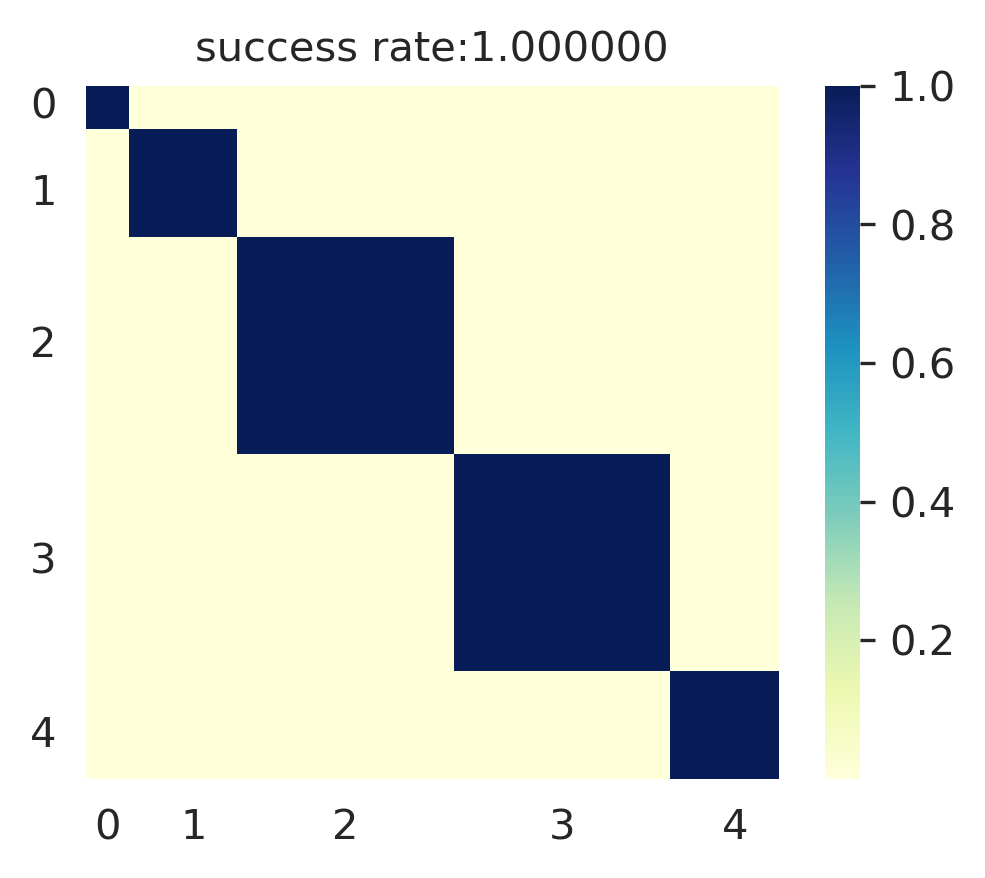

In [9]:
plt.rcParams["figure.figsize"]=(4,3)
plt.rcParams["savefig.dpi"]=300
plt.rcParams["figure.dpi"]=300
success_rate  = 1-error_rate
with sns.axes_style("white"):
    sns.heatmap(gram, square=True,cmap="YlGnBu")
    plt.xticks([1,5,12,22,30],["0","1","2","3","4"],rotation = 0)
    plt.yticks([1,5,12,22,30],["0","1","2","3","4"],rotation = 0)
    plt.title("success rate:%f"%success_rate,size=10)

# How gram matrix evolves after each query

In [10]:
state_list = record_state(dim_acc,num_bit,data["unitary_list"],oracle(num_bit,dim_query,dim_work))
gram_list = [compute_gram_matrix(state,string_list) for state in state_list]

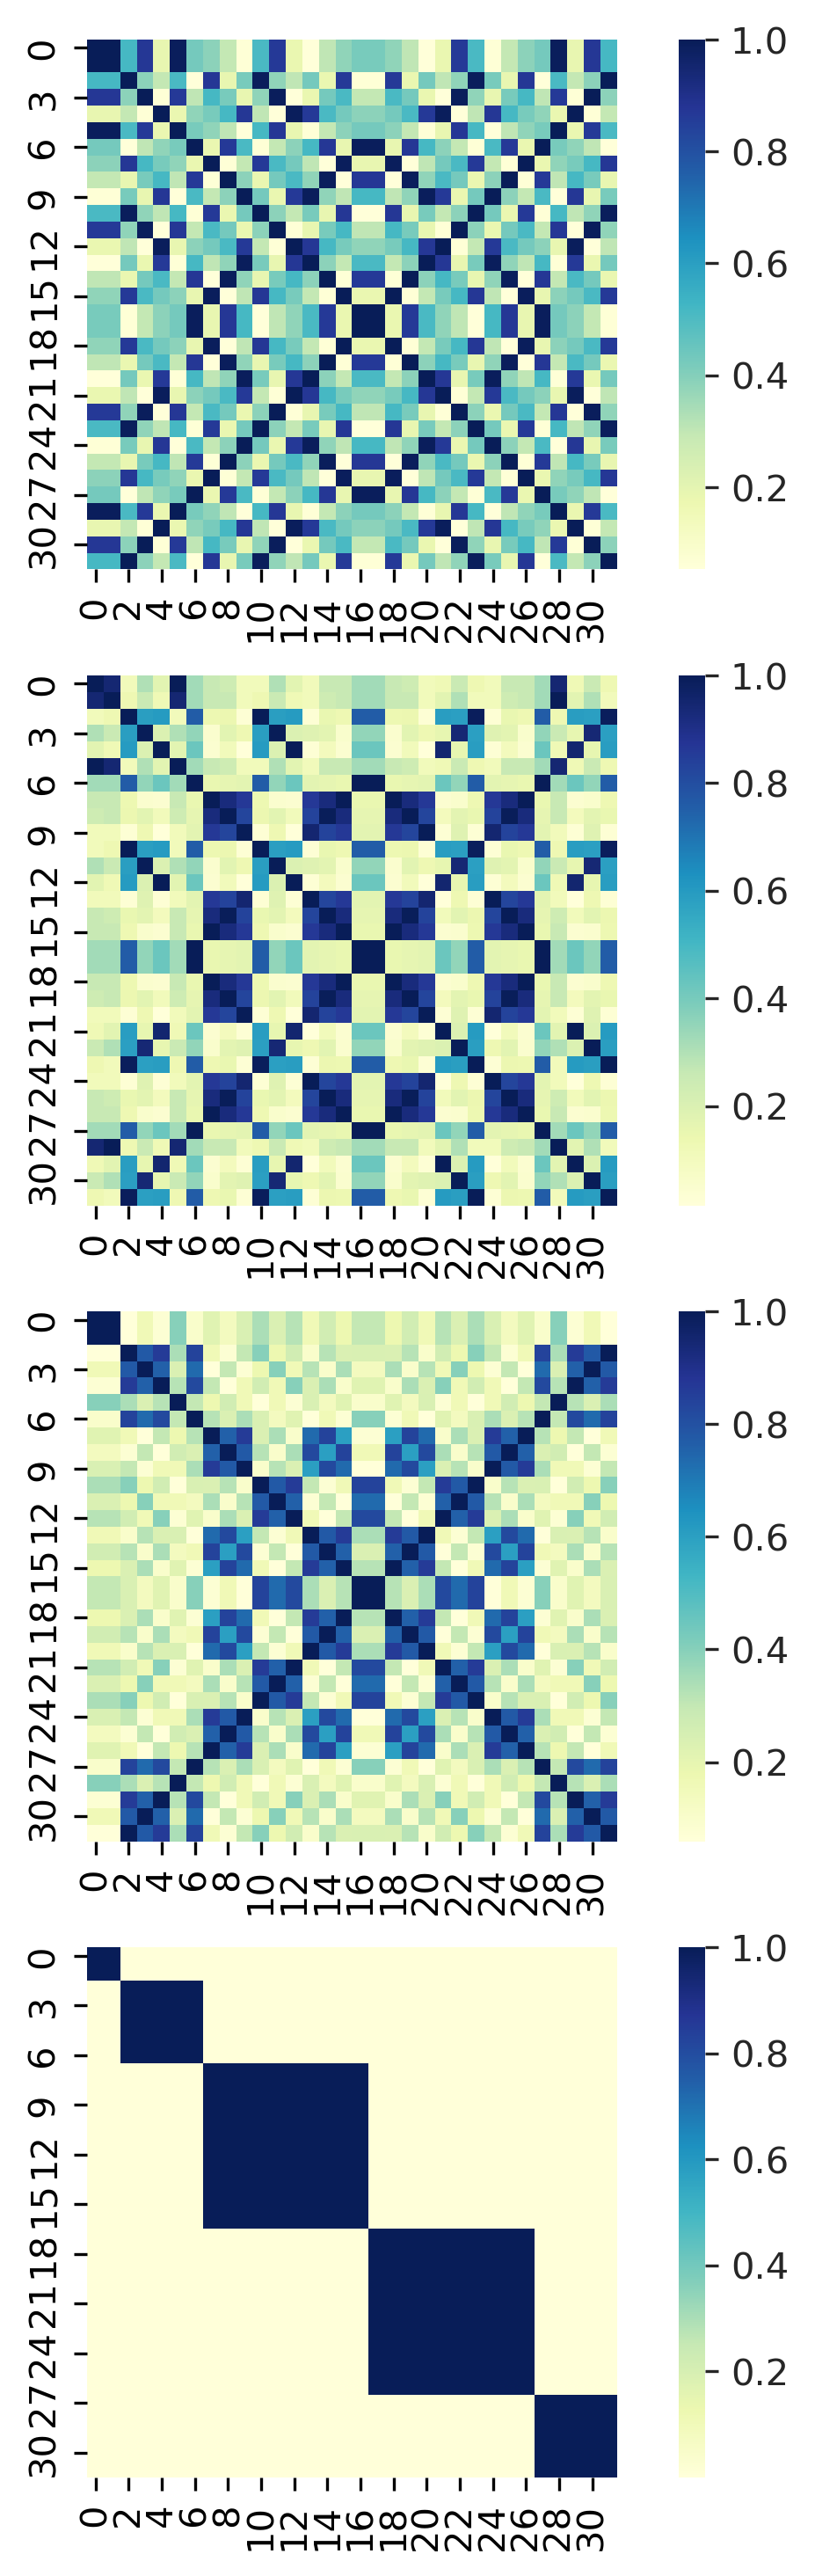

In [11]:
fig,ax = plt.subplots(4,1,figsize=(6,12))
plt.rcParams["figure.figsize"]=(15,4)
plt.rcParams["savefig.dpi"]=300
plt.rcParams["figure.dpi"]=300
for i in range(4):
    with sns.axes_style("white"):
        sns.heatmap(gram_list[i], square=True,cmap="YlGnBu",ax=ax[i])